In [13]:
#Developer: Ayush Oturkar
#netid: ao586
#Task: Data read, preprocessing and facet


In [14]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
import re
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [15]:
import os
os.getcwd()

'/Users/ayush_macbook_m2pro/Documents/GitHub/694Team14Dbms2023/notebooks'

In [16]:
# Open the zip file for reading
with zipfile.ZipFile("../Data/corona-out-3.zip", "r") as zip_file:
    # Extract all the files in the zip file to the current directory
    zip_file.extractall(path="../Data/")

In [17]:
twitterdf = pd.read_json('../Data/corona-out-3',lines = True)

In [19]:
twitterdf[~twitterdf['in_reply_to_status_id'].isna()].head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_in_countries
8,2020-04-25 12:21:42+00:00,1254022773598572544,1254022773598572544,@VinceMcMahon @TripleH We hereby honor to anno...,"[23, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.253768e+18,1.253768e+18,1.222640e+09,1.222640e+09,VinceMcMahon,"{'id': 1091660129894838272, 'id_str': '1091660...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,0.0,low,en,2020-04-25 12:21:42.499,NaN,NaN,NaN,NaN,NaN,{'full_text': '@VinceMcMahon @TripleH We hereb...,NaN
11,2020-04-25 12:21:43+00:00,1254022776207429633,1254022776207429632,@MichaelTouby @ChinaDaily @RVsmtown @YRFairyta...,"[83, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.254014e+18,1.254014e+18,7.196256e+17,7.196256e+17,MichaelTouby,"{'id': 865733987561381888, 'id_str': '86573398...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,0.0,low,en,2020-04-25 12:21:43.121,NaN,NaN,NaN,NaN,NaN,{'full_text': '@MichaelTouby @ChinaDaily @RVsm...,NaN
25,2020-04-25 12:21:44+00:00,1254022783249637376,1254022783249637376,@HealthDeptBlo @jam_kamal https://t.co/lyMFMxQ...,"[26, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.253355e+18,1.253355e+18,1.233376e+18,1.233376e+18,HealthDeptBlo,"{'id': 847489262018641921, 'id_str': '84748926...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,0.0,low,en,2020-04-25 12:21:44.800,NaN,NaN,NaN,NaN,NaN,{'full_text': '@HealthDeptBlo @jam_kamal https...,NaN
27,2020-04-25 12:21:45+00:00,1254022784193363969,1254022784193363968,@realDonaldTrump @TuckerCarlson @FoxNews Reis ...,"[41, 110]","<a href=""http://twitter.com/download/iphone"" r...",False,1.254021e+18,1.254021e+18,2.507388e+07,2.507388e+07,realDonaldTrump,"{'id': 567891167, 'id_str': '567891167', 'name...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,en,2020-04-25 12:21:45.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2020-04-25 12:21:45+00:00,1254022785547923457,1254022785547923456,@PARTHIPANG14 @boaperosa @mohandreamer Athu un...,"[39, 113]","<a href=""http://twitter.com/download/android"" ...",False,1.253969e+18,1.253969e+18,1.125973e+18,1.125973e+18,PARTHIPANG14,"{'id': 852883926, 'id_str': '852883926', 'name...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,in,2020-04-25 12:21:45.348,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
twitterdf.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,1.019160e+05,1.019160e+05,1.361000e+04,1.361000e+04,1.485500e+04,1.485500e+04,0.0,101916.0,101916.0,101916.0,101916.0,27433.000000,1.612900e+04,1.612900e+04
mean,1.254042e+18,1.254042e+18,1.253564e+18,1.253564e+18,3.915265e+17,3.915265e+17,NaN,0.0,0.0,0.0,0.0,0.029964,1.252695e+18,1.252695e+18
std,1.064351e+13,1.064351e+13,8.544387e+15,8.544387e+15,5.177342e+17,5.177342e+17,NaN,0.0,0.0,0.0,0.0,0.170491,1.643782e+16,1.643782e+16
min,1.254023e+18,1.254023e+18,8.218186e+17,8.218186e+17,3.987000e+03,3.987000e+03,NaN,0.0,0.0,0.0,0.0,0.000000,3.395442e+17,3.395442e+17
25%,1.254033e+18,1.254033e+18,1.253953e+18,1.253953e+18,1.454341e+08,1.454341e+08,NaN,0.0,0.0,0.0,0.0,0.000000,1.253658e+18,1.253658e+18
50%,1.254042e+18,1.254042e+18,1.254026e+18,1.254026e+18,1.866939e+09,1.866939e+09,NaN,0.0,0.0,0.0,0.0,0.000000,1.253943e+18,1.253943e+18
75%,1.254051e+18,1.254051e+18,1.254041e+18,1.254041e+18,9.824704e+17,9.824704e+17,NaN,0.0,0.0,0.0,0.0,0.000000,1.254023e+18,1.254023e+18
max,1.254060e+18,1.254060e+18,1.254060e+18,1.254060e+18,1.254056e+18,1.254056e+18,NaN,0.0,0.0,0.0,0.0,1.000000,1.254059e+18,1.254059e+18


In [5]:
print(f"Min date-time of tweet is {twitterdf['created_at'].min()}")
print(f"Max date-time of tweet is {twitterdf['created_at'].max()}")

Min date-time of tweet is 2020-04-25 12:21:41+00:00
Max date-time of tweet is 2020-04-25 14:48:38+00:00


In [6]:
# Print the number of unique users
twitterdf['user'] = twitterdf['user'].astype(str)
num_users = len(twitterdf['user'].unique())
print('Number of unique users:', num_users)

# Print the number of tweets
num_tweets = len(twitterdf)
print('Number of tweets:', num_tweets)

# Print the top 5 domains in the 'source' column
domains = twitterdf['source'].str.extract(r'<a href=".*?">(.*?)</a>', expand=False)
print('Top 5 domains in the "source" column:')
print(domains.value_counts().head())

# Print the top 5 most common hashtags
hashtags = twitterdf['entities'].apply(lambda x: [tag['text'].lower() for tag in x['hashtags']])
hashtags = hashtags.explode()
print('Top 5 most common hashtags:')
print(hashtags.value_counts().head())

Number of unique users: 101063
Number of tweets: 101916
Top 5 domains in the "source" column:
Twitter for Android    53019
Twitter for iPhone     23280
Twitter Web App        16797
Twitter for iPad        2216
Twitter Web Client      1353
Name: source, dtype: int64
Top 5 most common hashtags:
corona         6096
25aprile       1557
mattarella     1507
coronavirus    1317
covid19        1256
Name: entities, dtype: int64


Number of unique users: 101063
Number of tweets: 101916


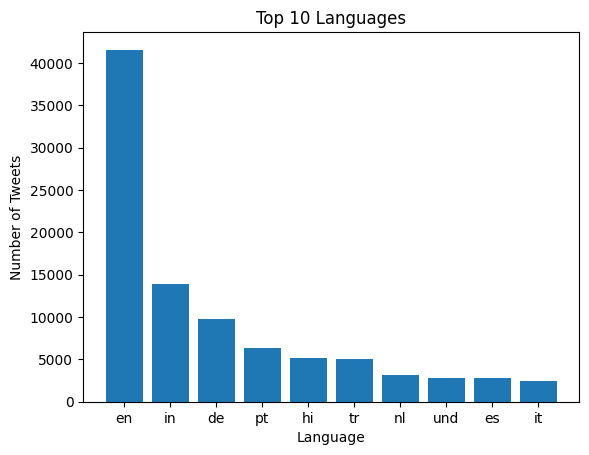

In [7]:
# Convert the user column from dictionaries to strings
twitterdf['user'] = twitterdf['user'].astype(str)

# Print the number of unique users
num_users = len(twitterdf['user'].unique())
print('Number of unique users:', num_users)

# Print the number of tweets
num_tweets = len(twitterdf)
print('Number of tweets:', num_tweets)

# Create a bar chart of the top 10 languages used in the tweets
top_langs = twitterdf['lang'].value_counts().nlargest(10)
plt.bar(top_langs.index, top_langs.values)
plt.title('Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

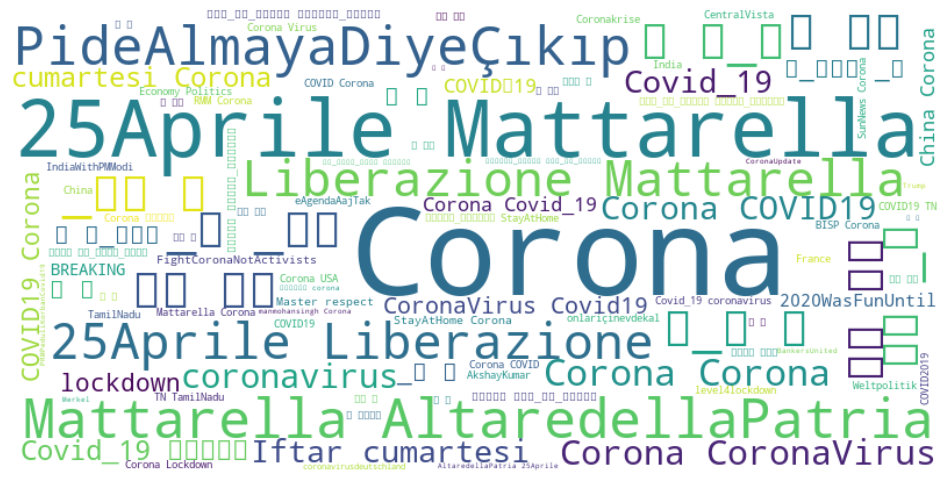

In [8]:
# Printing wordcloud from entities
hashtags = twitterdf['entities'].apply(lambda x: [tag['text'] for tag in x['hashtags']])
hashtags = ' '.join(hashtags.explode().dropna().values)


# Create a word cloud of the most common hashtags
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(hashtags)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

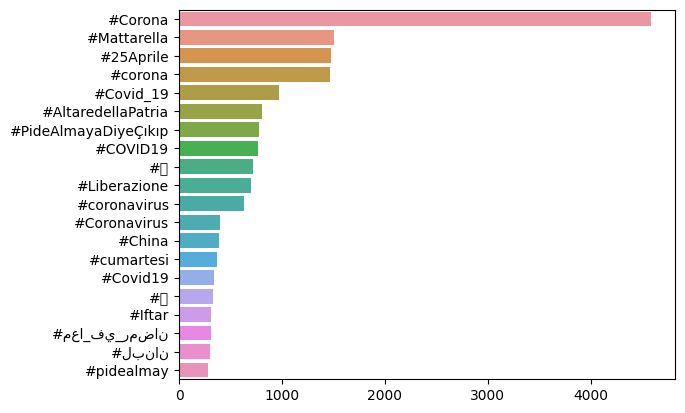

In [9]:
# extract hashtags from text column
hashtags = twitterdf['text'].apply(lambda x: re.findall(r'\#\w+', x))

# create a flat list of hashtags
hashtags_flat = [h for hashtags_list in hashtags for h in hashtags_list]

# count the frequency of each hashtag
hashtags_count = {h:hashtags_flat.count(h) for h in set(hashtags_flat)}

# sort the hashtags by frequency in descending order
hashtags_count_sorted = sorted(hashtags_count.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 hashtags
top_hashtags = dict(hashtags_count_sorted[:20])

# plot the top 20 hashtags
sns.barplot(x=list(top_hashtags.values()), y=list(top_hashtags.keys()))
plt.show()

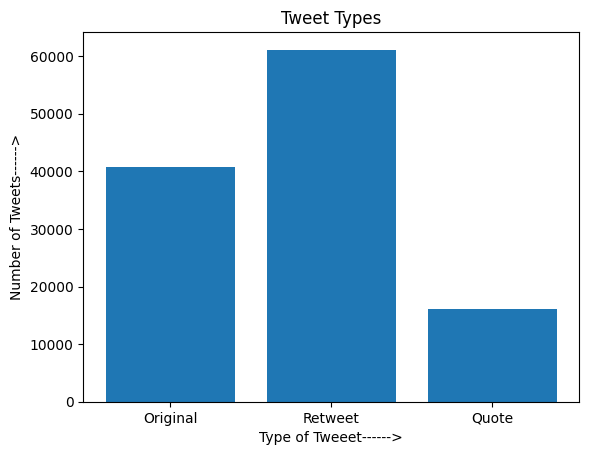

In [10]:
# Count the number of original tweets, retweets, and quotes
num_original = (~twitterdf['text'].str.startswith('RT ')).sum()
num_retweets = twitterdf['retweeted_status'].notna().sum()
num_quotes = twitterdf['quoted_status'].notna().sum()

# Plot a stacked bar chart of the tweet types
plt.bar(['Original', 'Retweet', 'Quote'], [num_original, num_retweets, num_quotes])
plt.title('Tweet Types')
plt.xlabel('Type of Tweeet------>')
plt.ylabel('Number of Tweets------>')
plt.show()


In [12]:
twitterdf.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'extended_entities',
       'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang',
       'timestamp_ms', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_tweet', 'withheld_in_countries'],
      dtype='object')